In [1]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit_aer import *
from qiskit.quantum_info import Statevector

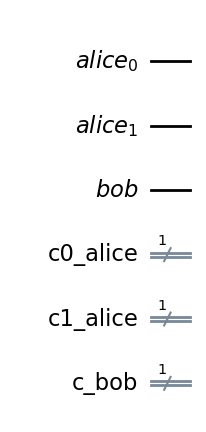

In [2]:
Alice = QuantumRegister(2, 'alice')
Cra0 = ClassicalRegister(1, 'c0_alice')
Cra1 = ClassicalRegister(1, 'c1_alice')
Bob = QuantumRegister(1,'bob')
Crb = ClassicalRegister(1, 'c_bob')

circuit = QuantumCircuit(Alice, Bob, Cra0,Cra1, Crb)

circuit.draw(output = 'mpl')


$\vert \psi \rangle = \vert + \rangle$

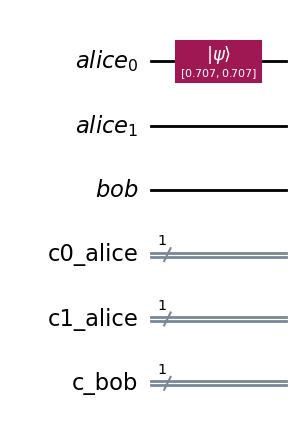

In [3]:
Initial_state = [np.sqrt(1/2),np.sqrt(1/2)] #criou um array 
circuit.initialize(Initial_state,Alice[0]) #iniciar um circuito com array e o qubit(Alice)
circuit.draw(output ='mpl')

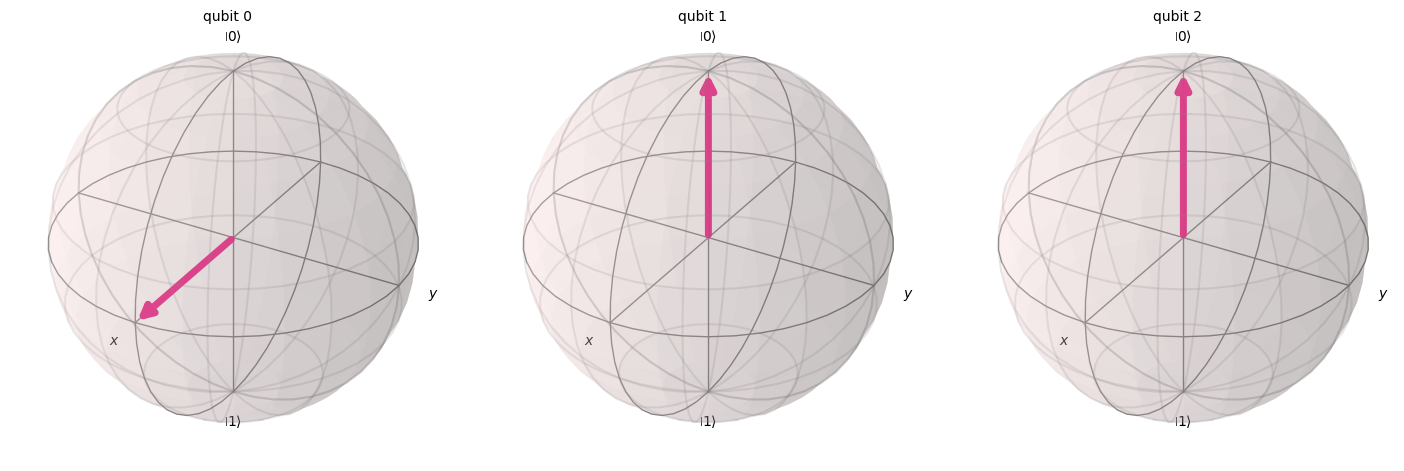

In [4]:
state = Statevector(circuit)
plot_bloch_multivector(state)

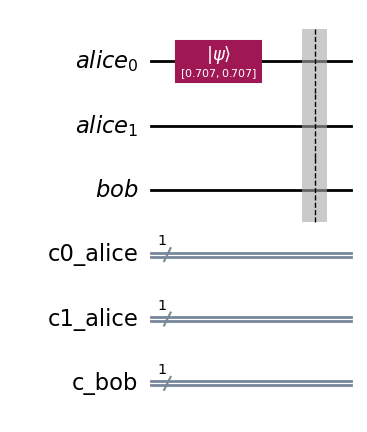

In [5]:
circuit.barrier()
circuit.draw(output='mpl')

### Emaranhamento 
-  a partir da porta cx

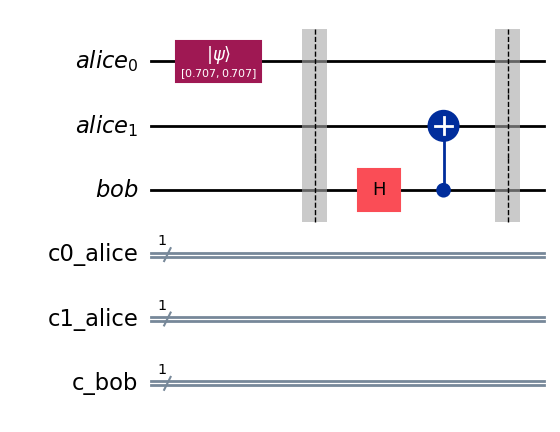

In [6]:
circuit.h(Bob[0])
circuit.cx(Bob[0], Alice[1])
circuit.barrier()
circuit.draw(output='mpl')

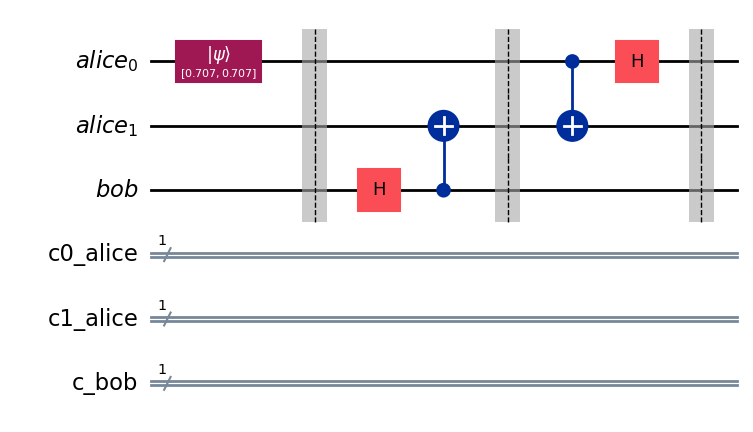

In [7]:
circuit.cx(Alice[0],Alice[1])
circuit.h(Alice[0])
circuit.barrier()
circuit.draw(output='mpl')

- Alice mede dois qubits(Colapso dos estados)
- Bob Operações condionadas a esse qubits na metada do par emaranhamento 
- condicionamento a operações de bob no qubit 0 e 1 --> Teleporte a longa distância
- info vai para o qubit clássico

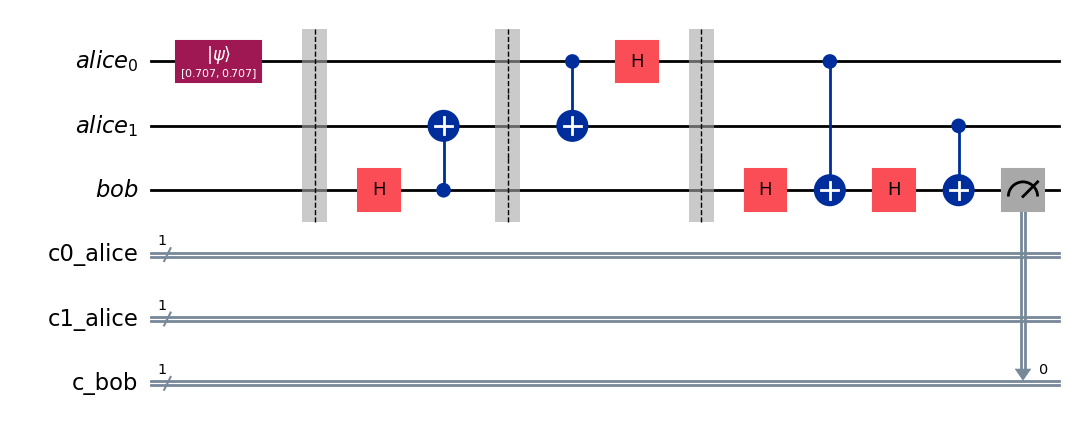

In [8]:
circuit.h(Bob[0])
circuit.cx(Alice[0],Bob[0])
circuit.h(Bob[0])
circuit.cx(Alice[1],Bob[0])
circuit.measure(Bob,Crb)

circuit.draw(output='mpl')

### Executar

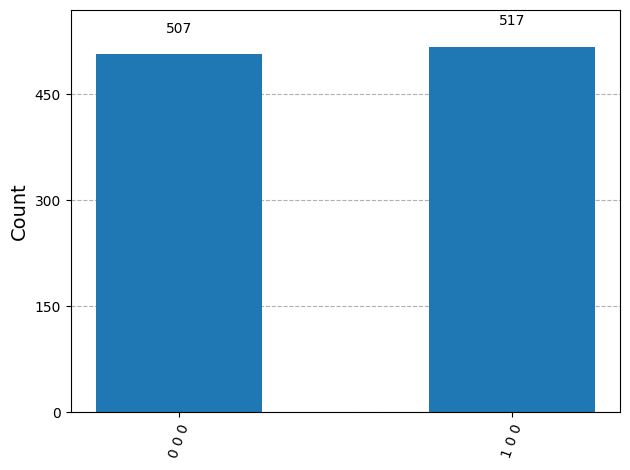

In [9]:
simulator = Aer.get_backend('statevector_simulator')

pm = generate_preset_pass_manager(optimization_level=0, backend=simulator)

transpile = pm.run(circuit)

counts = simulator.run(transpile,shots=1024).result().get_counts()

plot_histogram(counts)
